In [1]:
# -*- coding: utf-8 -*-
"""
Author: Michael Wentz
Class: Finance 7023
Module 4
4/5/2018
"""
import pandas as pd

import numpy as np

import math 

import matplotlib.pyplot as plt

file = "Return Data.xlsx"

# Load Spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)

['Return Data']


In [2]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse("Return Data")
df1.head
df1.info()

df1.set_index("Date", inplace=True)
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 35 columns):
Date      1099 non-null int64
Food      1099 non-null float64
Beer      1099 non-null float64
Smoke     1099 non-null float64
Games     1099 non-null float64
Books     1099 non-null float64
Hshld     1099 non-null float64
Clths     1099 non-null float64
Hlth      1099 non-null float64
Chems     1099 non-null float64
Txtls     1099 non-null float64
Cnstr     1099 non-null float64
Steel     1099 non-null float64
FabPr     1099 non-null float64
ElcEq     1099 non-null float64
Autos     1099 non-null float64
Carry     1099 non-null float64
Mines     1099 non-null float64
Coal      1099 non-null float64
Oil       1099 non-null float64
Util      1099 non-null float64
Telcm     1099 non-null float64
Servs     1099 non-null float64
BusEq     1099 non-null float64
Paper     1099 non-null float64
Trans     1099 non-null float64
Whlsl     1099 non-null float64
Rtail     1099 non-null float64

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Trans,Whlsl,Rtail,Meals,Fin,Other,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,,,,,,,,
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,1.93,-23.79,0.07,1.87,0.37,5.20,2.96,-2.30,-2.87,0.22
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,4.88,5.39,-0.75,-0.13,4.46,6.76,2.64,-1.40,4.19,0.25
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,0.05,-7.87,0.25,-0.56,-1.23,-3.86,0.36,-1.32,0.01,0.23
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49,-3.24,0.04,0.51,0.32
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.60,4.67,6.52,4.33,2.24,4.00,2.53,-0.20,-0.35,0.31


In [3]:
# gets 12 month rolling average return
df2 = df1
df2 = df2.rolling(window=12, min_periods=12).mean()
df3 = df2
df3

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Trans,Whlsl,Rtail,Meals,Fin,Other,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,,,,,,,,
192607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Shifts rolling average down one month to make it the previous
# 12 months average
df3 = df3.shift(periods=1)
df3

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Trans,Whlsl,Rtail,Meals,Fin,Other,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,,,,,,,,
192607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Removes non-industry columns
df3.drop(columns=["Mkt-RF", "SMB", "HML", "RF"], inplace=True)
df3.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
192607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#removes first 12 blank months
df3 = df3[12:]
df3

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
192707,1.615833,4.175833,3.114167,0.194167,4.141667,0.960833,1.729167,2.236667,3.820833,3.190000,...,1.617500,3.301667,2.920833,0.235833,1.898333,-6.765000,0.904167,1.776667,1.535000,0.238333
192708,1.989167,4.990833,3.372500,0.045000,3.375833,1.459167,1.556667,2.909167,4.616667,3.520833,...,1.859167,2.712500,3.265000,0.595833,2.239167,-3.856667,1.740833,2.010833,2.053333,0.372500
192709,1.967500,2.406667,3.150000,0.515833,2.996667,1.800833,1.895833,2.578333,4.333333,2.881667,...,1.714167,3.215833,3.086667,1.107500,1.691667,-4.520833,2.443333,2.067500,1.823333,0.302500
192710,2.374167,2.655833,3.430833,0.315833,3.915833,1.950833,2.325833,2.991667,4.386667,2.846667,...,2.057500,3.207500,3.418333,1.850000,2.046667,-3.398333,3.056667,2.609167,2.440000,0.660000
192711,2.424167,2.865000,3.315833,0.734167,3.345833,2.187500,3.120000,3.466667,4.161667,2.545833,...,1.892500,3.788333,3.120833,2.285000,1.884167,-3.931667,2.820833,2.805833,3.211667,1.065833
192712,2.492500,3.115000,3.494167,0.894167,5.214167,2.460000,3.135833,3.321667,4.481667,2.766667,...,1.992500,3.665833,3.599167,3.370833,2.076667,-4.429167,3.286667,2.695833,3.691667,1.665000
192801,2.829167,4.515833,3.367500,0.947500,5.442500,3.105833,3.073333,3.274167,4.015000,2.453333,...,1.937500,2.495833,3.104167,3.843333,1.785833,-4.279167,3.184167,2.440000,4.391667,1.949167
192802,3.110833,4.520000,3.183333,0.760833,5.066667,3.071667,3.750833,3.077500,3.905833,2.486667,...,1.805833,2.369167,3.323333,4.185833,1.563333,-2.864167,3.338333,2.181667,4.710833,1.997500
192803,2.495833,3.015833,2.561667,0.550000,4.803333,2.690000,3.315833,2.820000,3.159167,1.399167,...,1.450000,1.584167,3.087500,3.802500,1.019167,-3.845833,2.962500,1.394167,4.230833,1.750833


In [7]:
#rank industry return by month, hihger number means better return
df4 = df3.rank(axis=1)
ind_rank = df3.rank(axis=1)
df4

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
192707,14.0,30.0,24.0,3.0,29.0,7.0,16.0,20.0,28.0,25.0,...,15.0,26.0,23.0,4.0,18.0,1.0,6.0,17.0,11.0,5.0
192708,14.0,30.0,26.0,3.0,27.0,8.0,9.0,22.0,29.0,28.0,...,13.0,19.0,24.0,5.0,17.0,1.0,12.0,15.0,16.0,4.0
192709,15.0,17.0,26.0,4.0,24.0,10.0,14.0,19.0,30.0,22.0,...,9.0,27.0,25.0,5.0,8.0,1.0,18.0,16.0,11.0,3.0
192710,14.0,17.0,27.0,3.0,29.0,8.0,12.0,20.0,30.0,19.0,...,10.0,22.0,26.0,7.0,9.0,1.0,21.0,16.0,15.0,4.0
192711,13.0,19.0,25.0,3.0,26.0,10.0,20.0,27.0,30.0,14.0,...,9.0,28.0,21.0,12.0,8.0,1.0,17.0,16.0,23.0,5.0
192712,11.0,16.0,22.0,3.0,30.0,10.0,17.0,20.0,28.0,15.0,...,7.0,25.0,24.0,21.0,8.0,1.0,19.0,14.0,27.0,5.0
192801,15.0,29.0,22.0,3.0,30.0,18.0,16.0,20.0,25.0,10.0,...,7.0,11.0,17.0,23.0,6.0,1.0,19.0,9.0,28.0,8.0
192802,16.0,28.0,18.0,3.0,30.0,13.0,23.0,14.0,24.0,11.0,...,6.0,10.0,20.0,26.0,5.0,1.0,21.0,9.0,29.0,8.0
192803,15.0,22.0,16.0,4.0,30.0,18.0,25.0,19.0,24.0,7.0,...,8.0,9.0,23.0,28.0,5.0,1.0,21.0,6.0,29.0,11.0


In [8]:
# Compute Industry average ranks
df5 = df4.mean()
print(df5.sort_values(ascending=False))

ElcEq    16.827967
Carry    16.693652
Servs    16.564857
Games    16.545998
Smoke    16.445262
Beer     16.376265
BusEq    16.242870
Meals    16.034959
Autos    15.939282
Fin      15.876725
Hlth     15.839926
FabPr    15.827967
Paper    15.674333
Chems    15.617295
Txtls    15.611316
Rtail    15.598896
Oil      15.455382
Trans    15.159154
Food     15.092916
Cnstr    15.071757
Clths    14.908924
Whlsl    14.867525
Coal     14.827047
Books    14.747010
Util     14.705612
Hshld    14.685373
Steel    14.651334
Mines    14.605336
Telcm    14.315547
Other    14.189512
dtype: float64


In [9]:
#Gets dataframe of Autos vs. Date
df6 = df4.T
df6 = df6[14:15]
df6 = df6.T
df6

,Autos
Date,
192707,27.0
192708,25.0
192709,29.0
192710,28.0
192711,29.0
192712,29.0
192801,27.0
192802,27.0
192803,26.0


Text(0,0.5,'Autos')

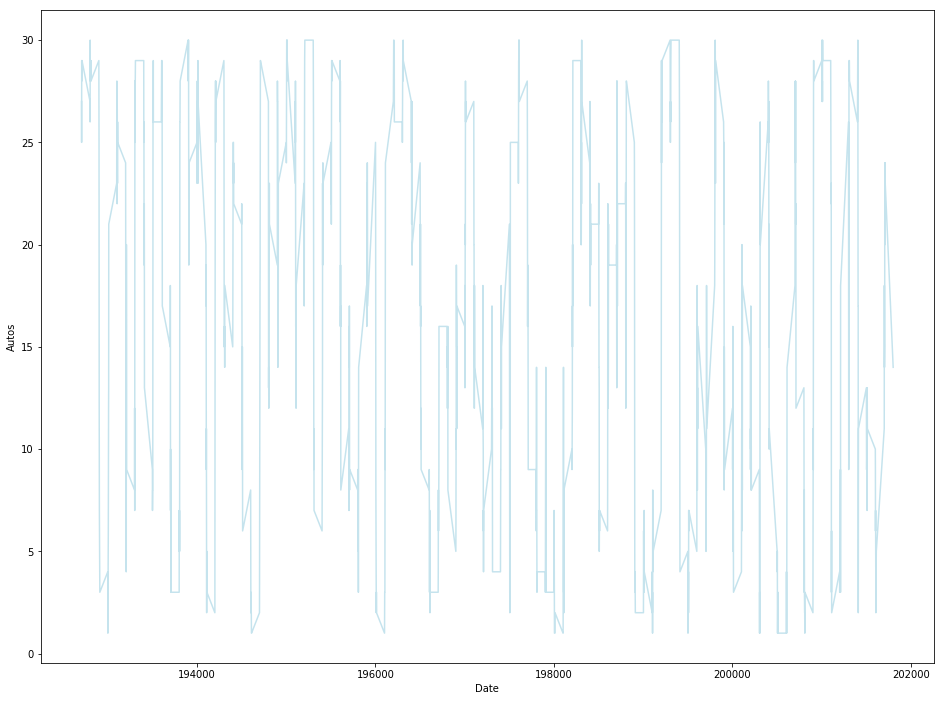

In [10]:
#Plot Autos Rank vs. Time
ax = df6.plot(kind="line", legend=False, color="lightblue", figsize=(16,12), alpha=0.7)
ax.set_ylabel("Autos")

In [11]:
df4

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
192707,14.0,30.0,24.0,3.0,29.0,7.0,16.0,20.0,28.0,25.0,...,15.0,26.0,23.0,4.0,18.0,1.0,6.0,17.0,11.0,5.0
192708,14.0,30.0,26.0,3.0,27.0,8.0,9.0,22.0,29.0,28.0,...,13.0,19.0,24.0,5.0,17.0,1.0,12.0,15.0,16.0,4.0
192709,15.0,17.0,26.0,4.0,24.0,10.0,14.0,19.0,30.0,22.0,...,9.0,27.0,25.0,5.0,8.0,1.0,18.0,16.0,11.0,3.0
192710,14.0,17.0,27.0,3.0,29.0,8.0,12.0,20.0,30.0,19.0,...,10.0,22.0,26.0,7.0,9.0,1.0,21.0,16.0,15.0,4.0
192711,13.0,19.0,25.0,3.0,26.0,10.0,20.0,27.0,30.0,14.0,...,9.0,28.0,21.0,12.0,8.0,1.0,17.0,16.0,23.0,5.0
192712,11.0,16.0,22.0,3.0,30.0,10.0,17.0,20.0,28.0,15.0,...,7.0,25.0,24.0,21.0,8.0,1.0,19.0,14.0,27.0,5.0
192801,15.0,29.0,22.0,3.0,30.0,18.0,16.0,20.0,25.0,10.0,...,7.0,11.0,17.0,23.0,6.0,1.0,19.0,9.0,28.0,8.0
192802,16.0,28.0,18.0,3.0,30.0,13.0,23.0,14.0,24.0,11.0,...,6.0,10.0,20.0,26.0,5.0,1.0,21.0,9.0,29.0,8.0
192803,15.0,22.0,16.0,4.0,30.0,18.0,25.0,19.0,24.0,7.0,...,8.0,9.0,23.0,28.0,5.0,1.0,21.0,6.0,29.0,11.0


In [12]:
# Get winners (rank >= 16)
winners = df4
winners[winners < 16] = 0
winners = winners.replace(0, np.NaN)
winners

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
192707,NaN,30.0,24.0,NaN,29.0,NaN,16.0,20.0,28.0,25.0,...,NaN,26.0,23.0,NaN,18.0,NaN,NaN,17.0,NaN,NaN
192708,NaN,30.0,26.0,NaN,27.0,NaN,NaN,22.0,29.0,28.0,...,NaN,19.0,24.0,NaN,17.0,NaN,NaN,NaN,16.0,NaN
192709,NaN,17.0,26.0,NaN,24.0,NaN,NaN,19.0,30.0,22.0,...,NaN,27.0,25.0,NaN,NaN,NaN,18.0,16.0,NaN,NaN
192710,NaN,17.0,27.0,NaN,29.0,NaN,NaN,20.0,30.0,19.0,...,NaN,22.0,26.0,NaN,NaN,NaN,21.0,16.0,NaN,NaN
192711,NaN,19.0,25.0,NaN,26.0,NaN,20.0,27.0,30.0,NaN,...,NaN,28.0,21.0,NaN,NaN,NaN,17.0,16.0,23.0,NaN
192712,NaN,16.0,22.0,NaN,30.0,NaN,17.0,20.0,28.0,NaN,...,NaN,25.0,24.0,21.0,NaN,NaN,19.0,NaN,27.0,NaN
192801,NaN,29.0,22.0,NaN,30.0,18.0,16.0,20.0,25.0,NaN,...,NaN,NaN,17.0,23.0,NaN,NaN,19.0,NaN,28.0,NaN
192802,16.0,28.0,18.0,NaN,30.0,NaN,23.0,NaN,24.0,NaN,...,NaN,NaN,20.0,26.0,NaN,NaN,21.0,NaN,29.0,NaN
192803,NaN,22.0,16.0,NaN,30.0,18.0,25.0,19.0,24.0,NaN,...,NaN,NaN,23.0,28.0,NaN,NaN,21.0,NaN,29.0,NaN


In [13]:
#Get winners return
winners[winners > 0] = 1
winners_id = winners
winners = winners*df1
winners = winners[12:]
winners.head()

,Autos,Beer,Books,BusEq,Carry,Chems,Clths,Cnstr,Coal,ElcEq,...,Rtail,SMB,Servs,Smoke,Steel,Telcm,Trans,Txtls,Util,Whlsl
Date,,,,,,,,,,,,,,,,,,,,,
192707,13.71,4.59,1.78,6.19,NaN,17.69,6.01,NaN,NaN,14.69,...,NaN,NaN,2.15,4.39,NaN,NaN,6.02,4.36,NaN,NaN
192708,7.32,-3.98,5.46,2.25,3.97,2.10,NaN,NaN,NaN,7.06,...,NaN,NaN,8.06,3.83,NaN,NaN,-1.69,0.47,NaN,NaN
192709,6.28,7.01,10.04,4.17,3.73,5.97,NaN,NaN,NaN,0.11,...,7.61,NaN,2.15,4.63,NaN,NaN,NaN,1.89,NaN,NaN
192710,-4.55,-0.80,2.63,-4.66,-6.71,-7.46,NaN,NaN,NaN,-8.22,...,-5.03,NaN,4.97,-0.32,NaN,NaN,NaN,-2.61,NaN,NaN
192711,6.77,10.29,16.62,9.38,NaN,9.04,2.06,NaN,NaN,11.38,...,12.11,NaN,2.30,6.69,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# get avg winners return by month
winnersavg = winners.mean(axis= 1)
winnersavg

Date
192707     7.628667
192708     2.580000
192709     5.154000
192710    -2.517333
192711     8.071333
192712     3.088000
192801     0.786667
192802    -2.008000
192803    10.689333
192804     4.810667
192805     3.997333
192806    -5.075333
192807     1.294667
192808     8.779333
192809     3.622000
192810     2.336667
192811    11.457333
192812     0.036667
192901     7.740667
192902    -0.526667
192903    -2.437333
192904     2.296000
192905    -6.102667
192906    11.524000
192907     5.037333
192908     8.255333
192909    -0.418000
192910   -20.953333
192911   -12.427333
192912     2.262667
            ...    
201508    -5.022000
201509    -1.965333
201510     7.188667
201511    -0.363333
201512    -1.494667
201601    -4.056667
201602     0.406667
201603     5.918667
201604    -0.547333
201605     0.728000
201606     2.676667
201607     2.828667
201608    -1.135333
201609     0.830667
201610    -1.870000
201611     5.102000
201612     0.328667
201701     2.364667
201702     1.56

In [15]:
# get winners avg. excess return by month
winnerex = winnersavg
rf = df1[12:]
rf = rf["RF"]
winnerex = winnerex - rf

In [16]:
#winner summary Statistics
winnerex.describe()

count    1087.000000
mean        0.951941
std         5.555451
min       -27.828000
25%        -1.762333
50%         1.184667
75%         4.094333
max        43.028000
dtype: float64

In [17]:
#monthly sharpe ratio
winnerex_sharpeM = winnerex.mean()/winnerex.std()
print(winnerex_sharpeM)

0.17135262913493876


In [18]:
#annual sharpe ratio
winnerex_sharpeA = winnerex_sharpeM*math.sqrt(12)
winnerex_sharpeA

0.593582919344442

In [19]:
#Repeat for losers but modify winners 0/1 dataframe
losers = winners_id
print(losers)
losers = losers.replace(np.NaN, 2)
losers = losers.replace(1, np.NaN)
losers = losers.replace(2, 1)
print(losers)
#Get winners return
losers[losers > 0] = 1
losers = losers*df1
losers = losers[12:]
print(losers)
losersavg = losers.mean(axis= 1)
print(losersavg)
loserex = losersavg
loserex = loserex - rf
print(loserex)
loserex.describe()

        Food   Beer   Smoke  Games  Books  Hshld  Clths  Hlth   Chems  Txtls  \
Date                                                                           
192707    NaN    1.0    1.0    NaN    1.0    NaN    1.0    1.0    1.0    1.0   
192708    NaN    1.0    1.0    NaN    1.0    NaN    NaN    1.0    1.0    1.0   
192709    NaN    1.0    1.0    NaN    1.0    NaN    NaN    1.0    1.0    1.0   
192710    NaN    1.0    1.0    NaN    1.0    NaN    NaN    1.0    1.0    1.0   
192711    NaN    1.0    1.0    NaN    1.0    NaN    1.0    1.0    1.0    NaN   
192712    NaN    1.0    1.0    NaN    1.0    NaN    1.0    1.0    1.0    NaN   
192801    NaN    1.0    1.0    NaN    1.0    1.0    1.0    1.0    1.0    NaN   
192802    1.0    1.0    1.0    NaN    1.0    NaN    1.0    NaN    1.0    NaN   
192803    NaN    1.0    1.0    NaN    1.0    1.0    1.0    1.0    1.0    NaN   
192804    NaN    1.0    NaN    NaN    1.0    1.0    1.0    1.0    1.0    NaN   
192805    NaN    1.0    NaN    NaN    1.

count    1087.000000
mean        0.533033
std         5.971846
min       -29.171333
25%        -2.194000
50%         0.867333
75%         3.362333
max        48.650667
dtype: float64

In [20]:
#monthly sharpe ratio
loserex_sharpeM = loserex.mean()/loserex.std()
loserex_sharpeM

0.08925773705053211

In [21]:
#annual sharpe ratio
loserex_sharpeA = loserex_sharpeM*math.sqrt(12)
loserex_sharpeA

0.3091978710802893

In [22]:
#Compute long winner & short loser each month
ind_mom = winnerex - loserex
ind_mom = pd.DataFrame(ind_mom, columns=["ind-mom"])
print(ind_mom)
ind_mom.describe()

         ind-mom
Date            
192707  0.886667
192708  0.262000
192709  0.794667
192710  0.548667
192711  1.636667
192712  0.384667
192801  0.867333
192802  0.026000
192803  5.040000
192804  2.459333
192805  2.245333
192806  0.732000
192807  1.318667
192808  2.187333
192809  2.594667
192810  0.222000
192811  2.008667
192812  1.248667
192901  5.958667
192902 -0.986000
192903  0.218667
192904  0.300000
192905  0.661333
192906  4.421333
192907  2.770667
192908  5.088000
192909  3.594667
192910 -4.014000
192911 -0.731333
192912  3.595333
...          ...
201508 -0.088000
201509  5.598000
201510  1.030000
201511 -1.170000
201512  2.543333
201601  2.018667
201602 -3.806667
201603 -4.255333
201604 -6.004000
201605  1.373333
201606  3.390667
201607 -3.962667
201608 -1.720667
201609  1.756667
201610  1.400000
201611 -1.738000
201612 -1.214000
201701 -0.272000
201702 -1.645333
201703  0.053333
201704 -0.190667
201705  1.731333
201706 -1.141333
201707 -2.196000
201708  1.724000
201709  1.1360

,ind-mom
count,1087.000000
mean,0.418908
std,2.591381
min,-18.583333
25%,-0.900333
50%,0.574667
75%,1.870667
max,9.731333


In [23]:
#ind_mom sharpe ratio
ind_momsharpeA = (ind_mom.mean()/ind_mom.std())*math.sqrt(12)
ind_momsharpeA

ind-mom    0.559987
dtype: float64

In [24]:
#Create excess market data frame & 3 Fama Factor Dataframe
market_ex = df1[12:]
market_ex = market_ex["Mkt-RF"]
print(market_ex)
Fama3 = df1[12:]
print(Fama3)
Fama3.drop(Fama3.columns[0:30], axis=1, inplace=True)
Fama3.drop("RF", axis=1, inplace=True)
print(Fama3)

Date
192707     7.26
192708     1.97
192709     4.76
192710    -4.31
192711     6.58
192712     2.09
192801    -0.68
192802    -1.70
192803     8.81
192804     4.23
192805     1.52
192806    -4.85
192807     0.62
192808     6.68
192809     2.88
192810     1.33
192811    11.81
192812     0.36
192901     4.66
192902    -0.34
192903    -0.89
192904     1.43
192905    -6.39
192906     9.70
192907     4.46
192908     8.18
192909    -5.47
192910   -20.12
192911   -12.74
192912     1.33
          ...  
201508    -6.04
201509    -3.08
201510     7.75
201511     0.56
201512    -2.17
201601    -5.77
201602    -0.07
201603     6.96
201604     0.92
201605     1.78
201606    -0.05
201607     3.95
201608     0.50
201609     0.25
201610    -2.02
201611     4.86
201612     1.82
201701     1.94
201702     3.57
201703     0.17
201704     1.09
201705     1.06
201706     0.78
201707     1.87
201708     0.16
201709     2.51
201710     2.25
201711     3.12
201712     1.06
201801     5.57
Name: Mkt-RF, Lengt

C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
#Regression on to Excess Market Return
import statsmodels.api as sm

# Set dependent variable
y = ind_mom

# Set independent variable and add a constant variable
x = market_ex
x = sm.add_constant(x)

# Run regression
CAPM_Model = sm.OLS(y, x).fit()
print(CAPM_Model.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                ind-mom   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     20.46
Date:                Wed, 02 May 2018   Prob (F-statistic):           6.77e-06
Time:                        01:26:28   Log-Likelihood:                -2566.8
No. Observations:                1087   AIC:                             5138.
Df Residuals:                    1085   BIC:                             5148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4623      0.078      5.890      0.0

In [26]:
#Regression on to 3 Fama - French Factors
# Set dependent variable
y = ind_mom

# Set independent variable and add a constant variable
x = Fama3
x = sm.add_constant(x)

# Run regression
FAMA3_Model = sm.OLS(y, x).fit()
print(FAMA3_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                ind-mom   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     21.41
Date:                Wed, 02 May 2018   Prob (F-statistic):           1.79e-13
Time:                        01:26:28   Log-Likelihood:                -2545.6
No. Observations:                1087   AIC:                             5099.
Df Residuals:                    1083   BIC:                             5119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4999      0.077      6.465      0.0

Date
192707       7.628667
192708      10.208667
192709      15.362667
192710      12.845333
192711      20.916667
192712      24.004667
192801      24.791333
192802      22.783333
192803      33.472667
192804      38.283333
192805      42.280667
192806      37.205333
192807      38.500000
192808      47.279333
192809      50.901333
192810      53.238000
192811      64.695333
192812      64.732000
192901      72.472667
192902      71.946000
192903      69.508667
192904      71.804667
192905      65.702000
192906      77.226000
192907      82.263333
192908      90.518667
192909      90.100667
192910      69.147333
192911      56.720000
192912      58.982667
             ...     
201508    1295.590667
201509    1293.625333
201510    1300.814000
201511    1300.450667
201512    1298.956000
201601    1294.899333
201602    1295.306000
201603    1301.224667
201604    1300.677333
201605    1301.405333
201606    1304.082000
201607    1306.910667
201608    1305.775333
201609    1306.606000
20161

Text(0,0.5,'Cumulative Return')

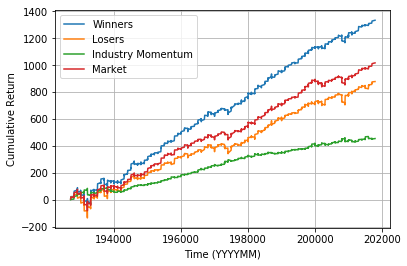

In [27]:
#Compute cumulative return of winners, losers, ind_mom, and the market
winnersC = np.cumsum(winnerex + rf)
print(winnersC)
losersC = np.cumsum(loserex + rf)
ind_momC = np.cumsum(ind_mom)
marketC = np.cumsum(market_ex + rf)
plt.Figure(figsize= (15,20))
plt.plot(winnersC, label= "Winners")
plt.plot(losersC, label= "Losers")
plt.plot(ind_momC, label= "Industry Momentum")
plt.plot(marketC, label= "Market")
plt.grid(True)
plt.legend(loc=0)
plt.axis("tight")
plt.xlabel("Time (YYYYMM)")
plt.ylabel("Cumulative Return")

Date
192707       7.628667
192708      10.208667
192709      15.362667
192710      12.845333
192711      20.916667
192712      24.004667
192801      24.791333
192802      22.783333
192803      33.472667
192804      38.283333
192805      42.280667
192806      37.205333
192807      38.500000
192808      47.279333
192809      50.901333
192810      53.238000
192811      64.695333
192812      64.732000
192901      72.472667
192902      71.946000
192903      69.508667
192904      71.804667
192905      65.702000
192906      77.226000
192907      82.263333
192908      90.518667
192909      90.100667
192910      69.147333
192911      56.720000
192912      58.982667
             ...     
201508    1295.590667
201509    1293.625333
201510    1300.814000
201511    1300.450667
201512    1298.956000
201601    1294.899333
201602    1295.306000
201603    1301.224667
201604    1300.677333
201605    1301.405333
201606    1304.082000
201607    1306.910667
201608    1305.775333
201609    1306.606000
20161

Text(0,0.5,'Cumulative Return')

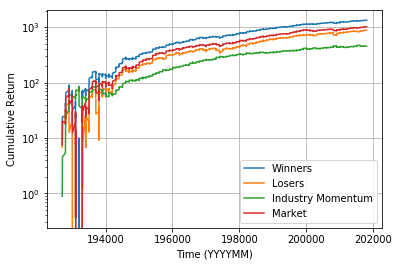

In [28]:
#Plot log cumulative return of winners, losers, ind_mom, and the market
winnersC = np.cumsum(winnerex + rf)
print(winnersC)
losersC = np.cumsum(loserex + rf)
ind_momC = np.cumsum(ind_mom)
marketC = np.cumsum(market_ex + rf)
plt.Figure(figsize= (15,20))
plt.semilogy(winnersC, label= "Winners")
plt.semilogy(losersC, label= "Losers")
plt.semilogy(ind_momC, label= "Industry Momentum")
plt.semilogy(marketC, label= "Market")
plt.grid(True)
plt.legend(loc=0)
plt.axis("tight")
plt.xlabel("Time (YYYYMM)")
plt.ylabel("Cumulative Return")

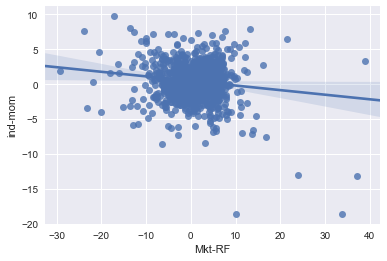

In [29]:
# Linear Regression with Seaborn
import seaborn as sns
sns.set(color_codes=True)
data = pd.concat([market_ex, ind_mom], axis=1)
sns.regplot(x="Mkt-RF", y="ind-mom", data= data)